# Classification Of Bank Customers
## Supervised Learning Machine Leaarning model 
<p>Rohan Takey </p><br>

---

Dataset : Portugal Bank Marketing dataset.<br>


___
Problem Statement : From The Bank Data classifying if the  client subscribed a term deposit or not .
___

### Table Of Content :
* [Overview](#Overview)
* [Technical Aspect](#Technical-Aspect)
* [Data Handling](#Data-Handling)
    - [EDA](#EDA)
        - [Categorical Features Analysis](#Categorical-Features-Analysis)
        - [Numerical Features Analysis](#Numerical-Features-Analysis)
        - [Missing Value](#Missing-Value-handling)
        - [Label Encoding](#Label-Encoding)
        - [Data Sampling and Target Variable Analysis](#Data-Sampling-and-Target-Variable-Analysis)
        - [Data Scaling](#Data-Scaling)
        - [Feature Selection](#Feature-Selection)
* [Building Machine Learning Models](#Building-Machine-Learning-Models)
    - [Logistic Regression](#Logistic-Regression)
    - [Naive bayes](#Naive-Bayes)
    - [K-Nearest neighbours](#KNN)
    - [Support vector Machines](#SVM)
    - [Adaboost Classifier](#Adaboost-Classifier)
* [Results](#Results)
* [Conclusion](#Conclusion)


### Overview
<p>Given is the ‘Portugal Bank Marketing’ dataset , Containing different features . All the features are categories in the 'Bank client data', 'Related with the last contact of the current campaign' , Other attributes' , 'Social and economic context attributes' sections.Depend upon all this features classifying the customer to the class of if they are subscribed to term deposite "yes" or "No". 
 </p>

### Technical Aspect

* This Notebook contains supervised machine learning model for classification problem.
* The Models in Python as scripting langauge are :
    - Logistic Regression (Statsmodels library,sklearn Library)
    - AdaBoost (sklearn Library)
    - Naïve Bayes (sklearn Library)
    - KNN (sklearn Library)
    - SVM (sklearn Library)
* For Feature Selection the following technique used :
    - Random Forest Classifier (Sklearn library)
* Data Distribution balencing done by :
    - SMOTE
* For Data standerdizing the following methods used (from sklearn library):
    - Standerd Scaler
    - Minmax Scaler



### Data Handling

In [114]:
# required libraries :

## Data Handling :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter # Data counting
import missingno

# Machine Learning Libraries :
from sklearn.preprocessing import LabelEncoder # For encoding categorical data
from imblearn.over_sampling import SMOTE # balencing the samples in data
from sklearn.preprocessing import StandardScaler,MinMaxScaler # Standeerdizing data (scaling )
from sklearn.ensemble import RandomForestClassifier # random Forest classifier for feature selection
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV # Splitting data # Cross validation of model # Finding best parametrs  
from sklearn.metrics import accuracy_score,classification_report # Report of the model
import statsmodels.api as smapi # Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB # naive bayes Classifier
from sklearn import neighbors,svm # KNN Classifier # SVM Classidier
from sklearn.ensemble import AdaBoostClassifier # Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Base model for boosting classifier



## Setting Default values :
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.max_colwidth=None
plt.style.use('seaborn-darkgrid')
palette=sns.color_palette('husl',10)
plt.rcParams['figure.figsize']=(20,8)
plt.rcParams['font.size']=15



In [66]:
# Reading data From Local Storage :
bank=pd.read_csv('bank.csv',delimiter=";",skipinitialspace=True)

In [67]:
# Sample of data
bank.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21168,32,admin.,single,university.degree,no,yes,no,cellular,aug,mon,61,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
14213,27,management,married,basic.9y,no,no,yes,cellular,jul,mon,174,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2847,32,admin.,single,high.school,no,no,no,telephone,may,wed,387,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
24257,42,housemaid,married,university.degree,no,no,no,cellular,nov,mon,176,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
22149,29,admin.,divorced,university.degree,no,yes,yes,cellular,aug,thu,120,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
18238,36,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,wed,103,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
22027,39,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,975,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
31405,32,blue-collar,married,basic.9y,no,no,no,cellular,may,wed,302,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
20335,54,blue-collar,married,professional.course,unknown,yes,yes,cellular,aug,tue,226,6,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
16923,41,entrepreneur,single,high.school,no,yes,no,cellular,jul,thu,149,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


**Attribute Information** :

- Bank client data:<br>
1) age (numeric)<br>
2) job: type of job (categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","selfemployed","services","student","technician","unemployed","unknown")<br>
3) marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced"
means divorced or widowed)<br>
4) education: education of individual (categorical:
"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
5) default: has credit in default? (categorical: "no","yes","unknown")<br>
6) housing: has housing loan? (categorical: "no","yes","unknown")<br>
7) loan: has personal loan? (categorical: "no","yes","unknown")<br>

- Related with the last contact of the current campaign:<br>
8) contact: contact communication type (categorical: "cellular","telephone")<br>
9) month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")<br>
10) dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly
affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known. Thus, this input should only be
included for benchmark purposes and should be discarded if the intention is to have a realistic
predictive model.<br>

- Other attributes:<br>
12) campaign: number of contacts performed during this campaign and for this client (numeric,
includes last contact)<br>
13) pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric; 999 means client was not previously contacted)<br>
14) previous: number of contacts performed before this campaign and for this client (numeric)<br>
15) poutcome: outcome of the previous marketing campaign (categorical:
"failure","nonexistent","success")<br>

- Social and economic context attributes:<br>
16) emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17) cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19) concavepoints_se: standard error for number of concave portions of the contour<br>
20) euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
21) nr.employed: number of employees - quarterly indicator (numeric)<br>
Output variable (desired target):<br>
22) y: has the client subscribed a term deposit? (binary: "yes","no")<br>

#### EDA

In [68]:
# Data Discription:
print('Total Number Of features :',bank.shape[1])
print('Total Number Of Entries :',bank.shape[0])

Total Number Of features : 21
Total Number Of Entries : 41188


In [69]:
# Feature information :
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- Primary analysis shows their are no null values in data .
- Different Data types are observed.

In [70]:
# Seprating feature names Into numerical and categorical columns :
cat_col = bank.select_dtypes(include='O').columns
num_col = bank.select_dtypes(exclude='O').columns
print('categorical features are :',list(cat_col))
print('\nNumerical features are :',list(num_col))


categorical features are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

Numerical features are : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [71]:
# Data Discription :
## Categorcal Features :
bank[cat_col].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


* Categorical data contains different unique values , and their range is also differs in each category.
* From the frequency of top variable occurance it looks like their is possiblity of singularity in 'loan','poutcome' and 'y' Feature.

##### Categorical Features Analysis

In [72]:
# Categorical Features Analysis :

# Distribution of variables unique values :
def bar_annotation(plot, feature, Number_of_categories, hue_categories):
    bar_height = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        number_of_features= list(Counter(feature).values())[i]
        for j in range(hue_categories):
            percentage = '{:.2f}%'.format(100 * (bar_height[(j*Number_of_categories + i)]/number_of_features))
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    return()

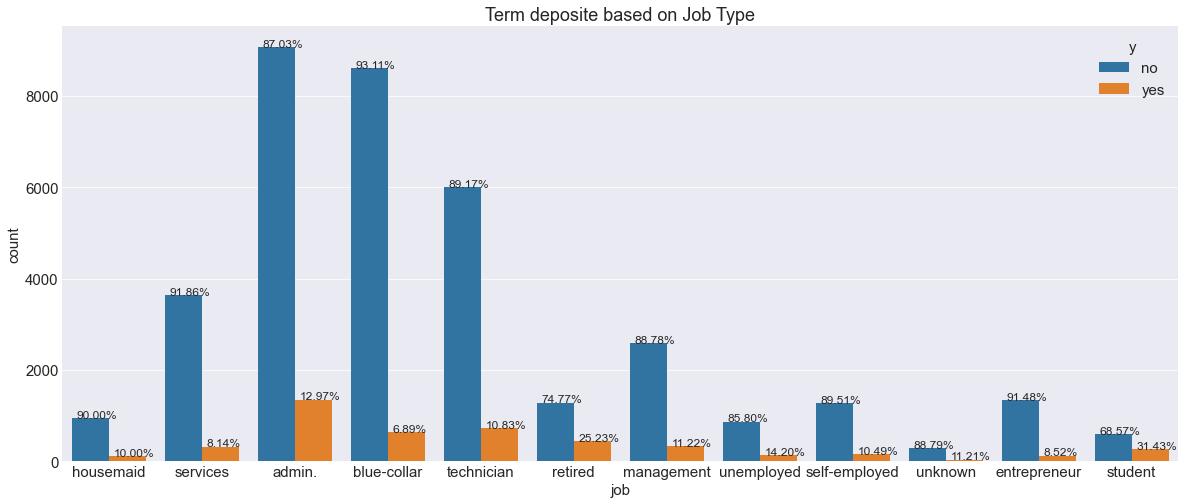

In [73]:
#Plot 1
ax=sns.countplot(bank.job,hue=bank.y)
plt.title('Term deposite based on Job Type')
bar_annotation(ax,bank.job,12,2)
plt.show()

* The plot shows the people subcribed for term deposite or not with their job titles.
* The Ratio on each bar indicated student are more active to subscribe for term deposite as 31.43 % of total student are subscribed.
* 'blue-coller' job people aremore in number as bank customer but they has the lowest term deposite participation.
* All the other job titles shows nearly 10% of total customers are subscribed for term deposite. 

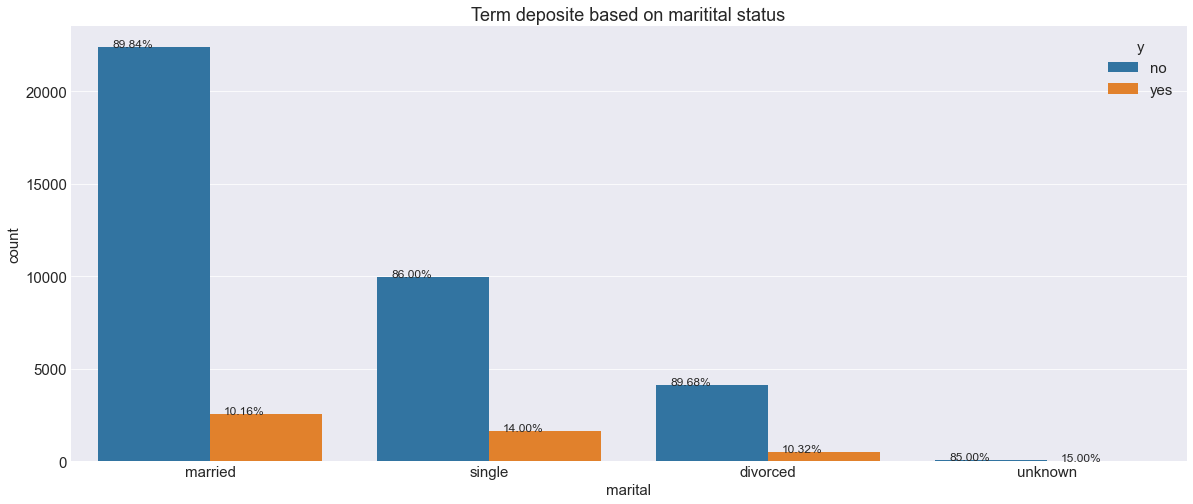

In [74]:
# Plot 2 
ax=sns.countplot(bank.marital,hue=bank.y)
plt.title('Term deposite based on maritital status')
bar_annotation(ax,bank.marital,4,2)
plt.show()

* Plot shows that single people are more tend for subsciption than other category.
* Where as unknown maritial status has more ratio still the category is not valid untill specific status collected.
* Married customers are having very less intenstion toward subscribing term deposite. 

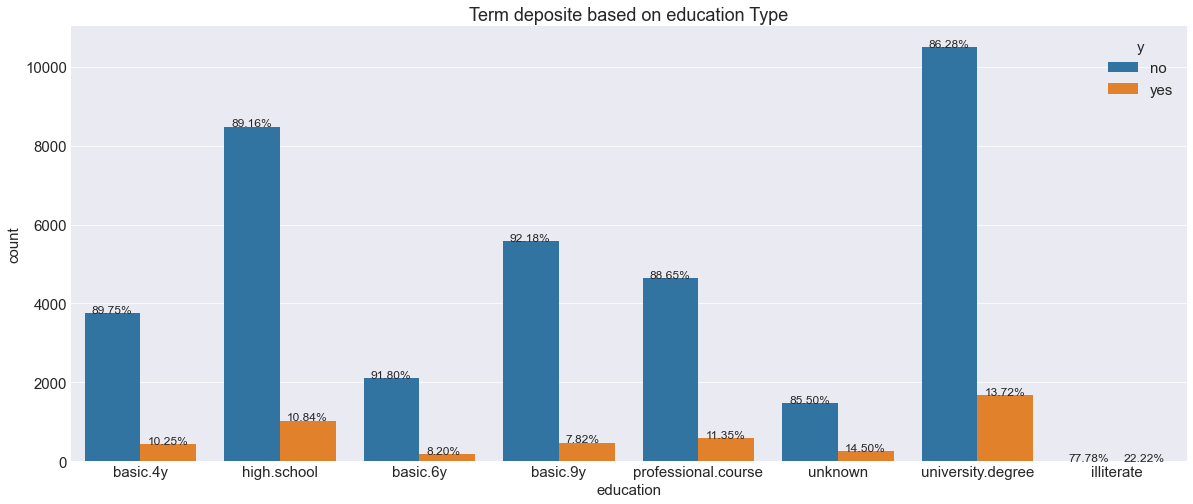

In [75]:
#plot 3
ax=sns.countplot(bank.education,hue=bank.y)
plt.title('Term deposite based on education Type')
bar_annotation(ax,bank.education,8,2)
plt.show()

* Education is the category where very unpredictable results occured.
* From plot its clear that illitrate people has more ratio to subscribe for term deposite.
* But the Fact is people who educated to university degree also choosing to subscribe.

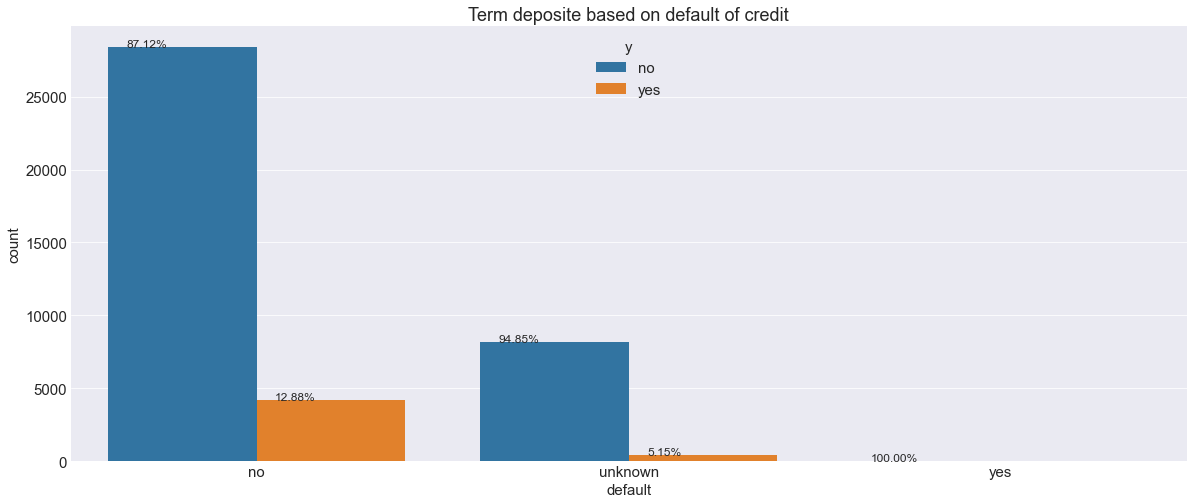

In [76]:
#plot 4
ax=sns.countplot(bank.default,hue=bank.y)
plt.title('Term deposite based on default of credit')
bar_annotation(ax,bank.default,3,2)
plt.show()

* The Loan plot is very obvious plot.
* Showing the 100% people who defaulted loan are not subscribing term deposite.
* where are their are chances that people with no default status can subscribe it.

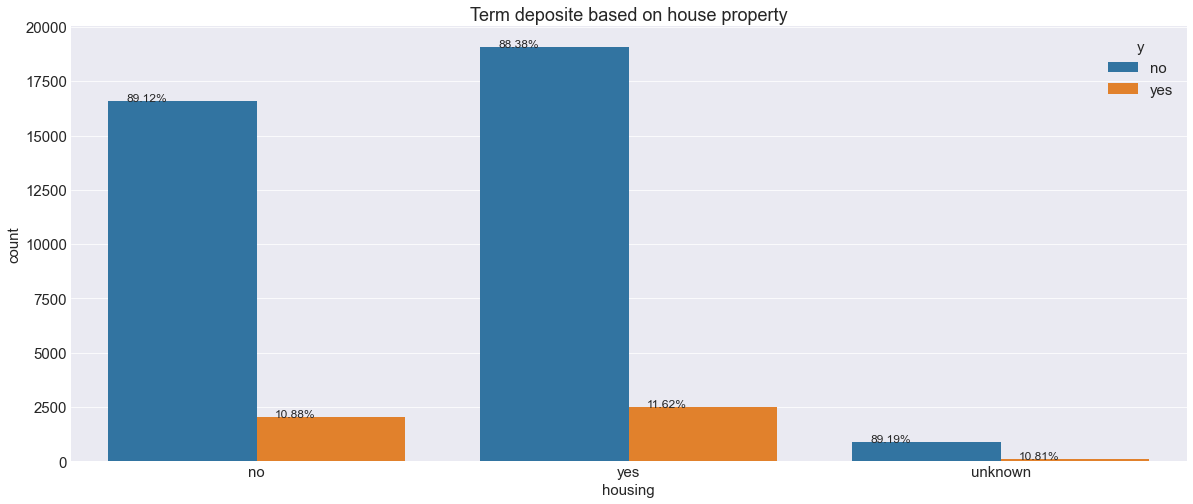

In [77]:
#plot 5
ax=sns.countplot(bank.housing,hue=bank.y)
plt.title('Term deposite based on house property')
bar_annotation(ax,bank.housing,3,2)
plt.show()

* House ownership does not give more of information.
* Their is a nearly equal ratio of people with own house or not going to subscribe for the term deposite. 

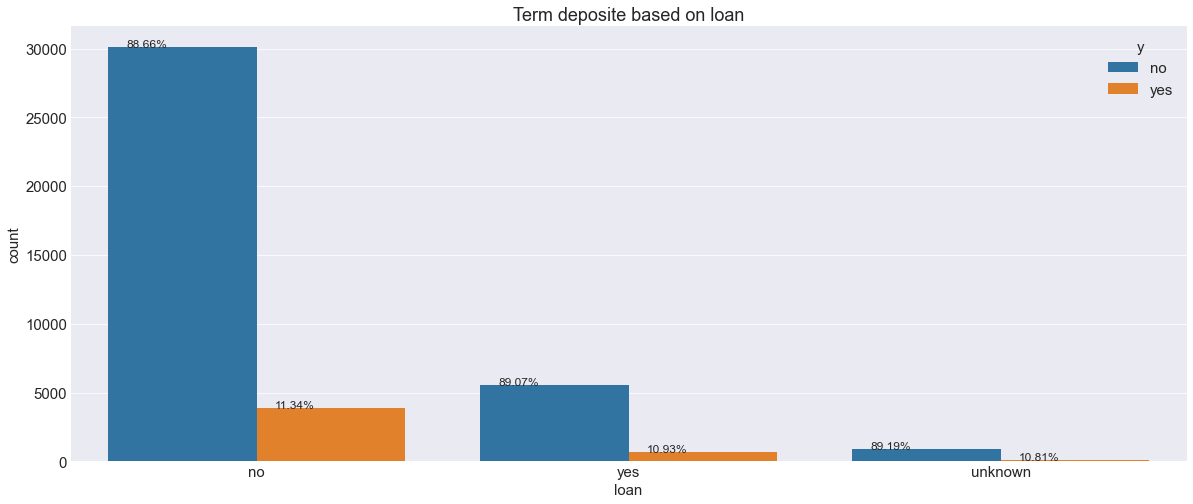

In [78]:
#plot 6
ax=sns.countplot(bank.loan,hue=bank.y)
plt.title('Term deposite based on loan')
bar_annotation(ax,bank.loan,3,2)
plt.show()

* People who has having loan in the bank has less number in total but the ratio is comparatively high for subscribing term deposite.
* As their is no loan on customers still the ratio is 11.34% of choosing term deposite.

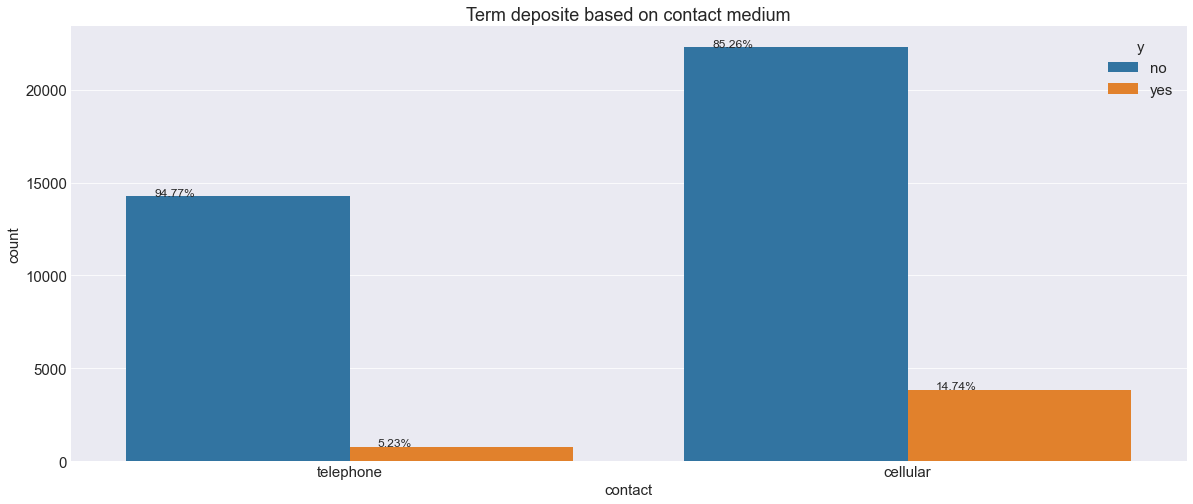

In [79]:
#plot 7
ax=sns.countplot(bank.contact,hue=bank.y)
plt.title('Term deposite based on contact medium')
bar_annotation(ax,bank.contact,2,2)
plt.show()

* In the contact with the customer , the customers got call on cellular are more tend to subscibe than telephonic contact.
* There might be different reasons as the customer not available at that mmoment or he was not giving time to listen about the campaign.

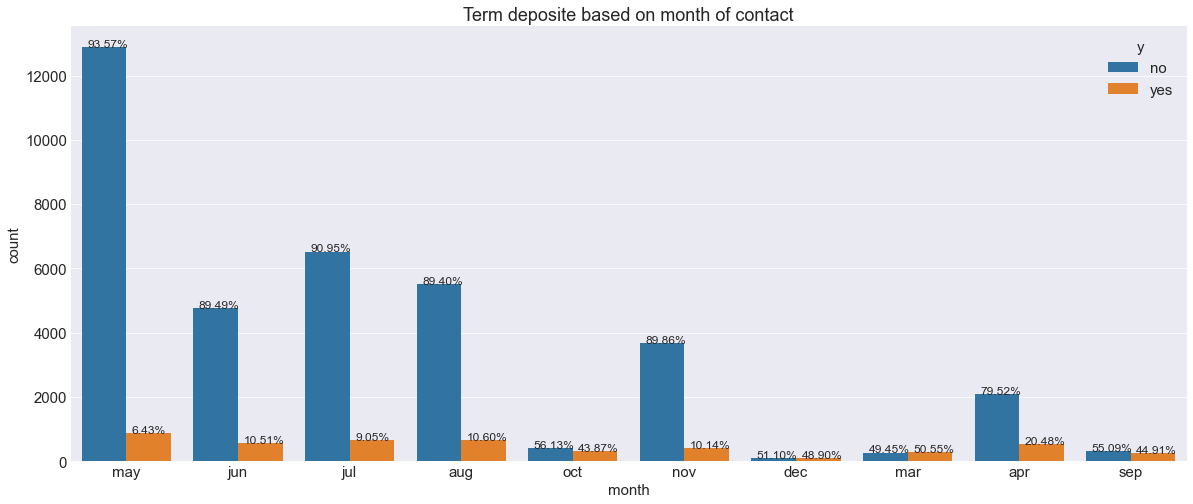

In [85]:
#plot 8
ax=sns.countplot(bank.month,hue=bank.y)
plt.title('Term deposite based on month of contact')
bar_annotation(ax,bank.month,10,2)
plt.show()

* So actually month of contact may not be affecting thr output much.
* But the possiblity of Starting a new financial year in portugal (sep-oct) causes high chances of subscibing a term deposite.
* Chances of the months oct, sep and dec are the highes.

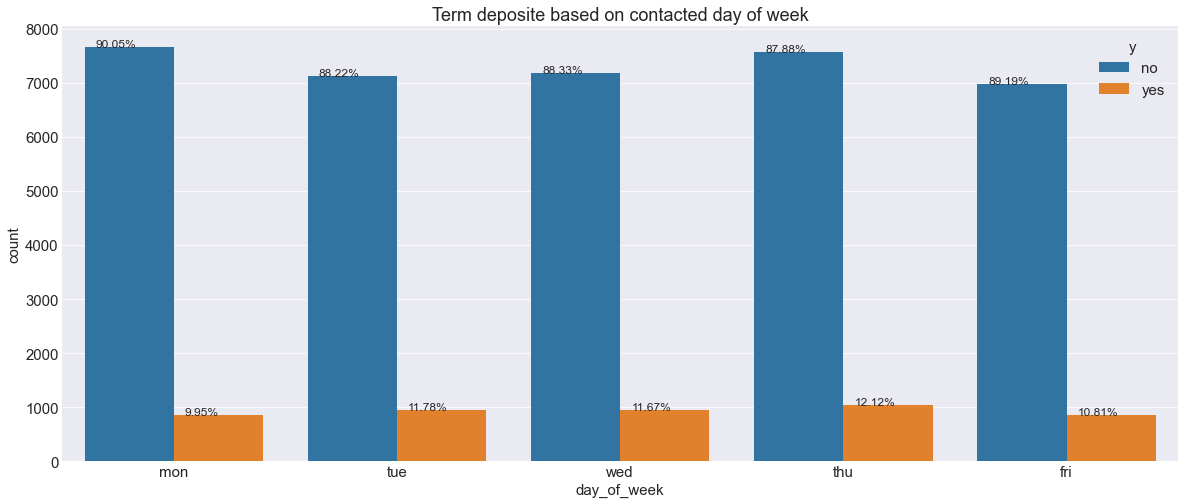

In [86]:
# Plot 9 
ax=sns.countplot(bank.day_of_week,hue=bank.y)
plt.title('Term deposite based on contacted day of week')
bar_annotation(ax,bank.day_of_week,5,2)
plt.show()

* Day of the week is the feature that should have a least important in the data.
* As the effect on which day the call is made actully does not affect that much to term deposite subsciption.

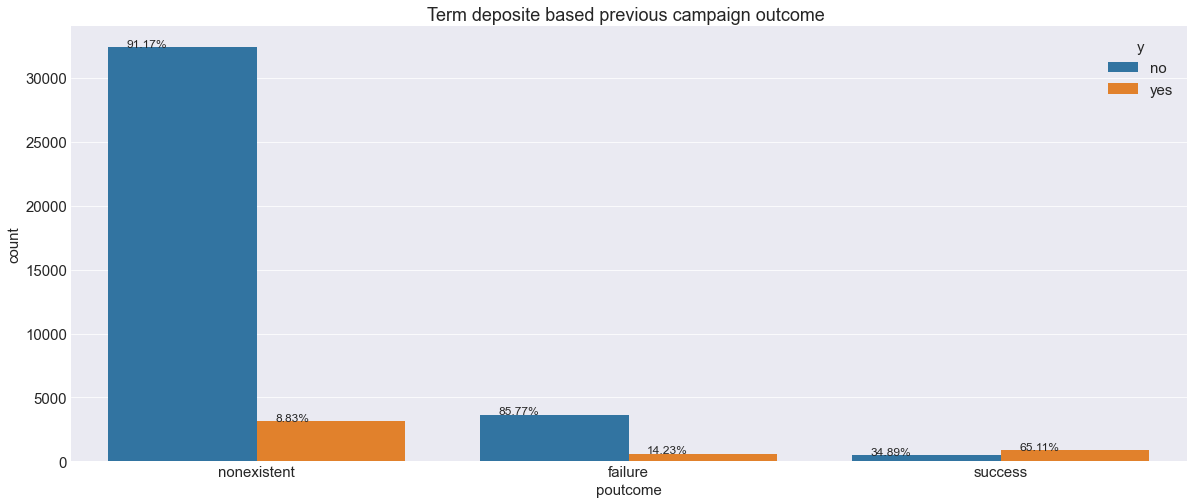

In [87]:
#plot 10
ax=sns.countplot(bank.poutcome,hue=bank.y)
plt.title('Term deposite based previous campaign outcome ')
bar_annotation(ax,bank.poutcome,3,2)
plt.show()

* As name suggest the previous campaign make a good impact on the subsciption having success rate of 65.11%

##### Numerical Features Analysis

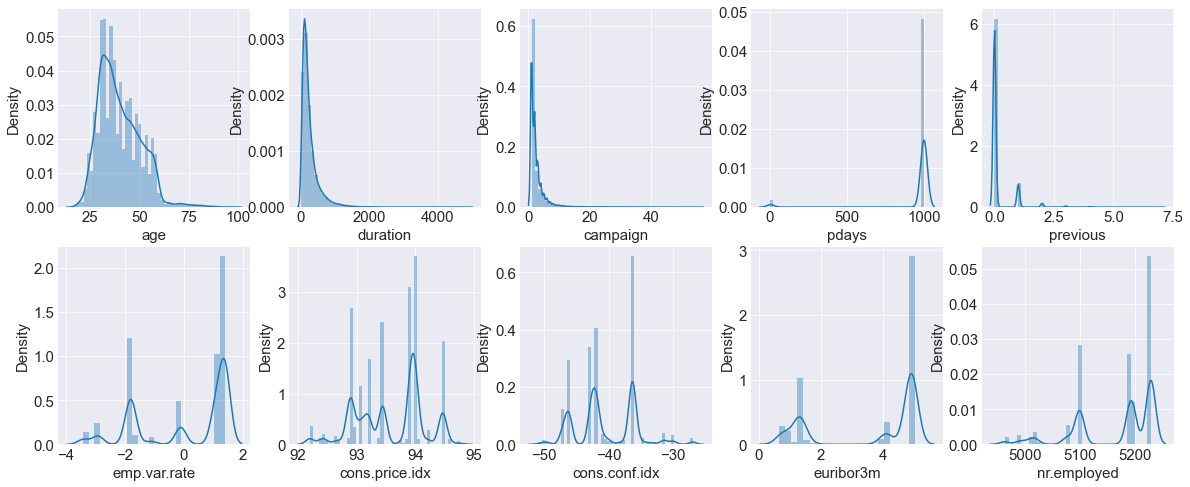

In [88]:
# Analysis Of numerical Data :
rows=2
cols=5
pos=1
for feature in num_col:
    plt.subplot(rows,cols,pos)
    sns.distplot(bank[feature])
    pos+=1


* Numerical data analysis shows the data is not normally distributed.
* Transformation of data required before model building.

##### Missing Value handling

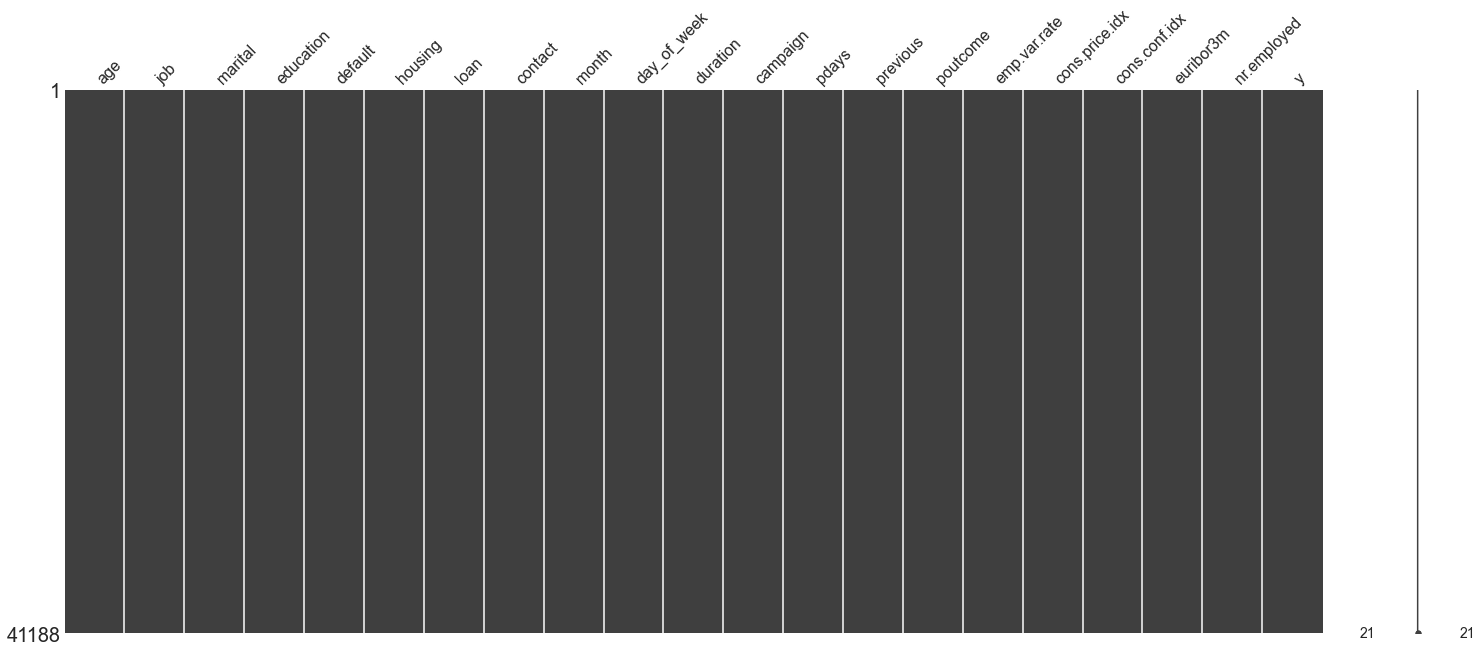

In [89]:
# Missing Data Analysis:

missingno.matrix(bank)
plt.show()


* No missing data in the dataset as the above matric does not show any white line in a feature column.

##### Label Encoding 

In [90]:
# Label encoding in ordianal Categorical Data:



# Here Education can be considerd an ordinal variable. we can use label encoder in it:
# as label Encoder uses alphabetical order to create rank, here illitrate and unknown gets higher rank than others :
# Replacing it with other value can make meaningfull labels.
bank.education[bank.education=='illiterate']='a_illiterate'
bank.education[bank.education=='unknown']='b_unknown'
       

In [91]:
# Now we can use label encoder on the education feature :
encoder=LabelEncoder()
bank.education=encoder.fit_transform(bank.education)

# also target variable required to be converted to classes : as NO : 0 , YES=1
bank.y=encoder.fit_transform(bank.y)


In [92]:
# Other categorical Data needs to be converted into one hot encoding:
data=pd.get_dummies(bank)
data.head()


,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,5,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,5,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,3,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,5,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


##### Data Sampling and Target Variable Analysis

In [93]:
# Defining Dependant and Independant Variables :
X=data.drop('y',axis=1)
y=data.y

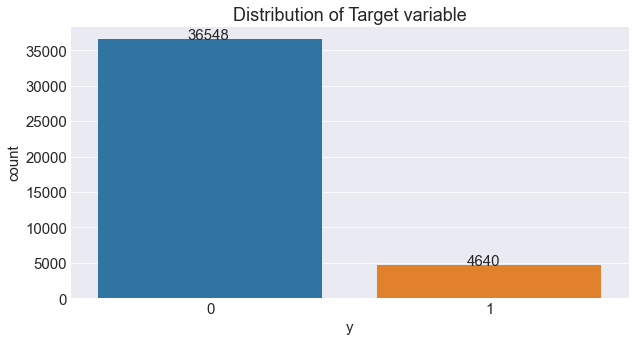

In [94]:
# Checking distribution of target variable:
plt.figure(figsize=(10,5))
ax=sns.countplot(data.y)
plt.title('Distribution of Target variable')

for col in ax.patches:
    ax.annotate(format(col.get_height()),(col.get_x()+col.get_width()/2.5,col.get_height()))
plt.show()

- Data is highly unbiased .
- Data sampling required .

In [95]:
# Sampling data :
sampling=SMOTE()
sampled_X,sampled_y=sampling.fit_resample(X,y)


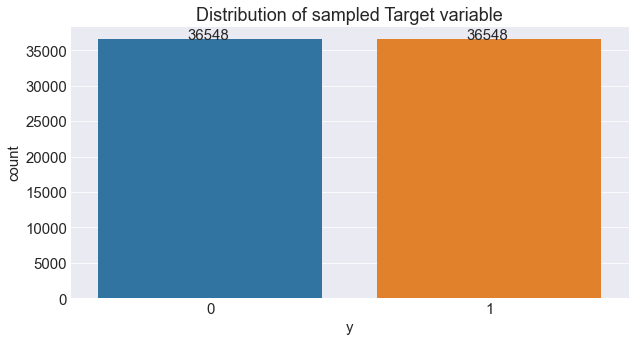

In [96]:
plt.figure(figsize=(10,5))
ax=sns.countplot(sampled_y)
plt.title('Distribution of sampled Target variable')

for col in ax.patches:
    ax.annotate(format(col.get_height()),(col.get_x()+col.get_width()/2.5,col.get_height()))
plt.show()

##### Data Scaling

In [97]:
# Data Standerdizing :
# Data Can be scaled using standerd scaler or minmax scaler.
standerd=StandardScaler()
minmax=MinMaxScaler()

In [98]:
# Using Standerd scaler:
train_ss=sampled_X.copy()
train_mm=sampled_X.copy()
train_ss.iloc[:,:]=standerd.fit_transform(sampled_X.iloc[:,:])
train_mm.iloc[:,:]=minmax.fit_transform(sampled_X.iloc[:,:])
test=sampled_y


##### Feature Selection

In [99]:
# Feature Selection using RandomForest classifier :
# using standerd scaler data
RF=RandomForestClassifier(n_estimators=100,max_features=2).fit(train_ss,test)


In [100]:
feature_imp1=pd.DataFrame({'features':train_ss.columns,'importance':RF.feature_importances_})
top_features=feature_imp1.sort_values('importance',ascending=False)
top_features[:10]

,features,importance
2,duration,0.178922
9,euribor3m,0.072341
10,nr.employed,0.053889
8,cons.conf.idx,0.041768
6,emp.var.rate,0.041209
7,cons.price.idx,0.038392
0,age,0.036404
37,contact_telephone,0.028665
32,housing_yes,0.025602
12,job_blue-collar,0.025245


In [101]:
# using Minmax scaler data:
RF2=RandomForestClassifier(n_estimators=100,max_features=2).fit(train_mm,test)

In [102]:
feature_imp1=pd.DataFrame({'features':train_ss.columns,'importance':RF2.feature_importances_})
top_features2=feature_imp1.sort_values('importance',ascending=False)
top_features2[:10]

,features,importance
2,duration,0.179233
9,euribor3m,0.074356
10,nr.employed,0.052013
6,emp.var.rate,0.043595
8,cons.conf.idx,0.040713
0,age,0.036785
7,cons.price.idx,0.035258
37,contact_telephone,0.029170
30,housing_no,0.028544
32,housing_yes,0.025473


* Both List shows same features.will use this features in next models .

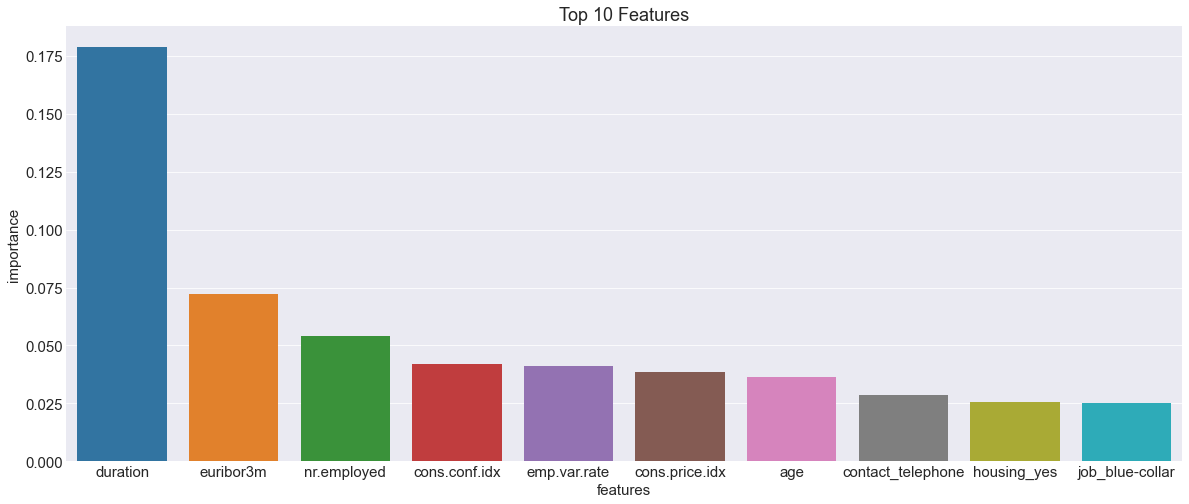

In [103]:
sns.barplot(top_features.features[:10],top_features.importance[:10])
plt.title('Top 10 Features')
plt.show()

### Building Machine Learning Models


In [104]:
# Data Sepration :
trainx,testx,trainy,testy=train_test_split(train_ss,test,test_size=0.30)


In [105]:
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(51167, 56)
(51167,)
(21929, 56)
(21929,)


In [106]:
#selecting top features:
train_x=trainx[top_features.features[:10].values]
test_x=testx[top_features.features[:10].values]

#### Logistic Regression

In [107]:
# Model 1 : Logit model
model1 = smapi.Logit(trainy,train_x).fit()
p1= model1.predict(test_x)

Optimization terminated successfully.
         Current function value: 0.321462
         Iterations 7


In [108]:
# Model Summary :
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51167
Model:                          Logit   Df Residuals:                    51157
Method:                           MLE   Df Model:                            9
Date:                Sat, 13 Nov 2021   Pseudo R-squ.:                  0.5362
Time:                        23:22:59   Log-Likelihood:                -16448.
converged:                       True   LL-Null:                       -35466.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
duration              2.2695      0.025     91.110      0.000       2.221       2.318
euribor3m             1.4534      0.114     12.770      0.000       1.230       1.676
nr.employed          -0.

* Model is converged.
* model p value is below 0.05.
* The model summary shows the coefficent of each variables we used to create model.
* p value of each features are less than 0.05 showing significance of features.

In [109]:
# Defining Prediction Threshold:
def predictClass(probs,cutoff):
    if (0<=cutoff<=1):
        P = probs.copy()
        P[P < cutoff] = 0
        P[P > cutoff] = 1
    
    return(P.astype(int))


In [110]:
# Results on threshold of 0.5
pred1=predictClass(p1,0.5)

In [111]:
# final report of model performance.
print(classification_report(testy,pred1))


              precision    recall  f1-score   support

           0       0.87      0.87      0.87     10932
           1       0.87      0.87      0.87     10997

    accuracy                           0.87     21929
   macro avg       0.87      0.87      0.87     21929
weighted avg       0.87      0.87      0.87     21929



In [112]:
Logit_accuracy=accuracy_score(testy,pred1)
print('Overall Accuracy Of Logit Model : {:.2f}%'.format(Logit_accuracy))

Overall Accuracy Of Logit Model : 0.87%


* Logistic regression using Logit model gives accuracy of 87% .

In [ ]:
# Model 2 : Sklearn.Logistic regression model
model2=LogisticRegression()
model2.fit(train_x,trainy)
pred2=model2.predict(test_x)
print(classification_report(testy,pred2))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     11069
           1       0.88      0.88      0.88     10860

    accuracy                           0.88     21929
   macro avg       0.88      0.88      0.88     21929
weighted avg       0.88      0.88      0.88     21929



In [ ]:
Logistic_accuracy=accuracy_score(testy,pred2)
print('Overall Accuracy Of Logistic Model : {:.2f}%'.format(Logistic_accuracy))

Overall Accuracy Of Logistic Model : 0.88%


* Logistic regression using sklearn logistic model gives same accuracy as Logit of 88% .

#### Naive Bayes

In [ ]:
# Naive bayes model
model3=GaussianNB().fit(train_x,trainy)
pred3=model3.predict(test_x)
print(classification_report(testy,pred3))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77     11069
           1       0.75      0.84      0.79     10860

    accuracy                           0.78     21929
   macro avg       0.79      0.78      0.78     21929
weighted avg       0.79      0.78      0.78     21929



In [ ]:
NB_accuracy=accuracy_score(testy,pred3)
print('Overall Accuracy Of Naive Bayes Model : {:.2f}%'.format(NB_accuracy))

Overall Accuracy Of Naive Bayes Model : 0.78%


* Naive Bayes model gives accuracy of 78%.

#### KNN


In [ ]:
# K nearest neighbours needs to find the value for K to create a model.
# K can be found with cross validation of different values of K between 3 to 12 .
# cross validation to determine best K
cv_accuracy=[]

n_list=np.arange(3,12,2)

for n in n_list:
    model=neighbors.KNeighborsClassifier(n_neighbors=n)
    scores=cross_val_score(model,train_x,trainy,cv=10,scoring='accuracy')
    cv_accuracy.append(scores.mean())

In [ ]:
# Accuracy of Each K in The range.
cv_accuracy

[0.9171340820270869,
 0.9149451734800508,
 0.9131080602868635,
 0.9109974142210661,
 0.909629329667027]

* nearly all the values of K has accuracy at 90%.
* Choosing the best K will be good for model creation.

In [ ]:
best_k=n_list[cv_accuracy.index(max(cv_accuracy))]
print('best K :',best_k)

best K : 3


Text(0.5, 1.0, 'Accuracy Vs Neighbors')

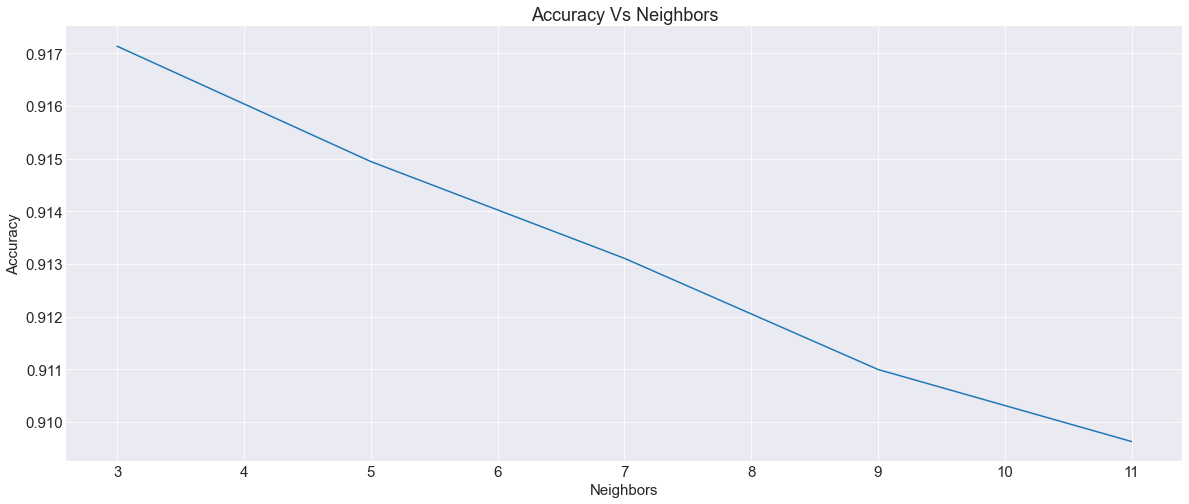

In [ ]:
# plot of accuracy vs neighbors 
plt.plot(n_list,cv_accuracy)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Neighbors')

* From the plot , it's clear that as the K value goes increasing the accuracy is decreasing . Hence the best K will be 3.

In [ ]:
# Build the model using best K
model4=neighbors.KNeighborsClassifier(n_neighbors=best_k).fit(train_x,trainy)  
pred4=model4.predict(test_x)  
print(classification_report(testy,pred4))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     11069
           1       0.90      0.93      0.92     10860

    accuracy                           0.92     21929
   macro avg       0.92      0.92      0.92     21929
weighted avg       0.92      0.92      0.92     21929



In [ ]:
KNN_accuracy=accuracy_score(testy,pred4)
print('Overall Accuracy Of K-Nearest Neighbours Model : {:.2f}%'.format(KNN_accuracy))

Overall Accuracy Of K-Nearest Neighbours Model : 0.92%


* KNN Model shows accuracy of 92%.

#### SVM

In [ ]:
# Random Parameters for SVM kernal .
lim=5 # For the processing purpose I considerd only 5 different values 
lov_c=np.logspace(-5,4,lim) # values of c  finction 
lov_g=np.random.random(lim) # gamma values with c in 0 to 1 

In [ ]:
#build parameters
# All The parametrs are not considerd as it took much computational power than I currently have.
param=[{ 'kernel':['linear'],'C':lov_c,
        'kernel':['sigmoid'],'C':lov_c,'gamma':lov_g
        #'kernel':['poly'],'C':lov_c,'gamma':lov_g,   
        #'kernel':['rbf'],'C':lov_c,'gamma':lov_g    
        } ]

In [ ]:
#model
model=svm.SVC()
grid=GridSearchCV(model,param_grid=param,scoring='accuracy',cv=2,n_jobs=-1).fit(train_x,trainy) # Cv=2 For faster training. 

In [ ]:
# Defining Best paramters :
bp=grid.best_params_
print(bp)

{'C': 0.31622776601683794, 'gamma': 0.020851854296909056, 'kernel': 'sigmoid'}


In [ ]:
# Building Model on best parameters.
model5=svm.SVC(kernel=bp['kernel'],C=bp['C'],gamma=bp['gamma']).fit(train_x,trainy)
pred5=model5.predict(test_x)

In [ ]:
# Model Report
print(classification_report(testy,pred5))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     11069
           1       0.88      0.89      0.88     10860

    accuracy                           0.88     21929
   macro avg       0.88      0.88      0.88     21929
weighted avg       0.88      0.88      0.88     21929



In [81]:
SVM_accuracy=accuracy_score(testy,pred5)
print('Overall Accuracy Of SVM Model : {:.2f}%'.format(SVM_accuracy))

Overall Accuracy Of SVM Model : 0.88%


* SVM Model Gives accuracy of 88%.

#### Adaboost Classifier

In [115]:
base_estimator = DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=50,learning_rate=0.2)
clf.fit(train_x,trainy)
pred6 = clf.predict(test_x)

cross_val = np.mean(cross_val_score(clf,train_x,trainy,cv=10,scoring='accuracy'))
print(classification_report(testy,pred6))
print('CV : {:.2f}'.format(cross_val))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10932
           1       0.93      0.95      0.94     10997

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929

CV : 0.94


In [117]:
AdaboostDT_accuracy=accuracy_score(testy,pred6)
print('Overall Accuracy Of Adaboost classifier (DT base) Model : {:.2f}%'.format(AdaboostDT_accuracy))

Overall Accuracy Of Adaboost classifier (DT base) Model : 0.94%


In [116]:
base_estimator = LogisticRegression(C=5)
clf = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=50,learning_rate=0.2)
clf.fit(train_x,trainy)
pred7 = clf.predict(test_x)

cross_val = np.mean(cross_val_score(clf,train_x,trainy,cv=10,scoring='accuracy'))
print(classification_report(testy,pred7))
print('CV : {:.2f}'.format(cross_val))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     10932
           1       0.85      0.85      0.85     10997

    accuracy                           0.85     21929
   macro avg       0.85      0.85      0.85     21929
weighted avg       0.85      0.85      0.85     21929

CV : 0.85


In [119]:
AdaboostLG_accuracy=accuracy_score(testy,pred7)
print('Overall Accuracy Of Adaboost classifier (Logistic Base) Model : {:.2f}%'.format(AdaboostLG_accuracy))

Overall Accuracy Of Adaboost classifier (Logistic Base) Model : 0.85%


### Results

In [121]:
accuracy=(Logit_accuracy,Logistic_accuracy,NB_accuracy,KNN_accuracy,SVM_accuracy,AdaboostDT_accuracy,AdaboostLG_accuracy)
models=('Logit','Logistic','Naive bayes','KNN','SVM Classifier','Adaboost(DT)','Adaboost(Logistic)')
Results=pd.DataFrame({'Models':models,'Accuracy':accuracy})

In [122]:
Results

,Models,Accuracy
0,Logit,0.868804
1,Logistic,0.881299
2,Naive bayes,0.783437
3,KNN,0.918464
4,SVM Classifier,0.883032
5,Adaboost(DT),0.935610
6,Adaboost(Logistic),0.850290


### Conclusion 

* Adaboost with Decision tree as base model gives maximum accuracy of 0.935%.
* Adaboost and KNN Models Perform Better in predicting if the client will subscribe to term deposite or Not .